**Modules pour charger les données dans Spark:**

In [1]:
#import obligatoires
import findspark
from pyspark.sql import SparkSession
import pyspark


#Initialisation de findspark:

findspark.init()
#%matplotlib notebook

#Récupération de SparkContext
sc = pyspark.SparkContext(appName="Pi")
spark = SparkSession.builder.appName("SimpleApp").getOrCreate()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import re

class Figures :
    
    @staticmethod
    def showPieChart(x,y, title = "PieChart"):
        """Cette fonction affiche le widget PieChart en fonction de pourcentages"""
        y2 = [float(i) for i in y]
        labels = Figures.funCalcLabel(y,y2)
        #colors = ['#86bcb6','#b6992d','#59a14f','#ffbe7d','#f28e2b','#8cd17d','#a0cbe8','#f1ce63','#e15759','#499894']
        fig, ax = plt.subplots(figsize=(15, 12), subplot_kw=dict(aspect="equal"))

        wedges, texts= ax.pie(y2,startangle=90, labels=labels)

        ax.legend(wedges, x,
                  title="légende",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

        ax.set_title(title)
        return plt.show()

    @staticmethod
    def funCalcPercent(pct, allvals):
        """Cette fonction calcule le pourcentage du nombre de chaque type de test """
        absolute = pct/np.sum(allvals)*100.
        return str(round(absolute,2))+"%"
    
    @staticmethod
    def funCalcLabel(y,y2):
        """ Cette fonction utilise funCalcPercent pour calculer l'ensemble des poucentages des tests"""
        L = []
        for i in range(0,len(y)):
            """
            if (i != len(y)-1 and i != len(y)-2):
                L .append(funCalcPercent(y[i],y2))
            else:
                L.append("")
            """
            L .append(Figures.funCalcPercent(y[i],y2))
        return L
    
    @staticmethod
    def funShowHisto(L, axisXLabels, yAxisName = "axe Y", xAxisName = "axe X"):
        """Cette fonction affiche l'histogramme"""
        # Basic plot
        height = L
        bars = [i for i in range(0,len(axisXLabels))]
        y_pos = np.arange(len(bars))
        plt.subplots(figsize=(29,5))
        plt.title(xAxisName)
        plt.ylabel(yAxisName)
        plt.xticks(bars,bars)
        plt.bar(y_pos, height)
        
    @staticmethod    
    def funToOneColumn(col1,col2):
        """Cette fonction reçoit les deux listes et retourne une liste
        avec les valeurs des deux listes concaténées."""
        L = []
        for i in range(0,len(col1)):
            L.append(str(col1[i]) + str('\t\t\t\t\t\t') + str(col2[i]))
        return L
    
    @staticmethod
    def funShowTable(concat):
        """ Cette fonction permet d'afficher la visualisation sous forme de table."""
        fig = go.Figure(data=[go.Table(   
          header=dict(
            values=['<b>Valeurs</b>'],
            line_color='darkslategray',
            fill_color='grey',
            align=['left','center'],
            font=dict(color='white', size=12)
          ),
          cells=dict(
            values=[concat],
            line_color='darkslategray',
            # 2-D list of colors for alternating rows
            fill_color = [['white','lightgrey']*len(concat)],
            align = ['left', 'center'],
            font = dict(color = 'darkslategray', size = 12)
            ))
        ])

        fig.update_layout(
            height=600,
            showlegend=False,
            title_text="")

        fig.update_layout(width=428, height=350)

        return fig.show()

**Chargement des données:**

In [3]:
#Lecture du dataframe
data = spark.read.csv("data.csv", header=True, sep=",")

**Affichage des différents colonnes:**

In [4]:
data

DataFrame[ID: string, URL: string, CRAWL_SOURCE: string, PROPERTY_TYPE: string, NEW_BUILD: string, DESCRIPTION: string, IMAGES: string, SURFACE: string, LAND_SURFACE: string, BALCONY_SURFACE: string, TERRACE_SURFACE: string, ROOM_COUNT: string, BEDROOM_COUNT: string, BATHROOM_COUNT: string, LUNCHROOM_COUNT: string, TOILET_COUNT: string, FURNISHED: string, FIREPLACE: string, AIR_CONDITIONING: string, GARDEN: string, SWIMMING_POOL: string, BALCONY: string, TERRACE: string, CELLAR: string, PARKING: string, PARKING_COUNT: string, HEATING_TYPES: string, HEATING_MODE: string, FLOOR: string, FLOOR_COUNT: string, CONSTRUCTION_YEAR: string, ELEVATOR: string, CARETAKER: string, ENERGY_CONSUMPTION: string, GREENHOUSE_GAS_CONSUMPTION: string, MARKETING_TYPE: string, PRICE: string, PRICE_M2: string, PRICE_EVENTS: string, RENTAL_EXPENSES: string, RENTAL_EXPENSES_INCLUDED: string, DEPOSIT: string, FEES: string, FEES_INCLUDED: string, EXCLUSIVE_MANDATE: string, AGENCIES_UNWANTED: string, OCCUPIED: str

# Partie Datacleansing:

In [5]:
data.filter("PROPERTY_TYPE == 'PROGRAM'").show(2)

+---+---+------------+-------------+---------+-----------+------+-------+------------+---------------+---------------+----------+-------------+--------------+---------------+------------+---------+---------+----------------+------+-------------+-------+-------+------+-------+-------------+-------------+------------+-----+-----------+-----------------+--------+---------+------------------+--------------------------+--------------+-----+--------+------------+---------------+------------------------+-------+----+-------------+-----------------+-----------------+--------+-----------+-----------+-------+----+--------+---------+----------------------+--------------------+---------------+------------------------+
| ID|URL|CRAWL_SOURCE|PROPERTY_TYPE|NEW_BUILD|DESCRIPTION|IMAGES|SURFACE|LAND_SURFACE|BALCONY_SURFACE|TERRACE_SURFACE|ROOM_COUNT|BEDROOM_COUNT|BATHROOM_COUNT|LUNCHROOM_COUNT|TOILET_COUNT|FURNISHED|FIREPLACE|AIR_CONDITIONING|GARDEN|SWIMMING_POOL|BALCONY|TERRACE|CELLAR|PARKING|PARKING_

**ID Reporting:**

In [33]:
data.select(data.ID).show(2)

+--------------------+
|                  ID|
+--------------------+
|22c05930-0eb5-11e...|
|8d092fa0-bb99-11e...|
+--------------------+
only showing top 2 rows



In [32]:
#regroupement par ID
dataGroupByID = data.groupBy('ID').count()
dataGroupByID.show(2)

+--------------------+-----+
|                  ID|count|
+--------------------+-----+
|91df4150-9f6d-11e...|    1|
|   Commerces à 100 m|    1|
+--------------------+-----+
only showing top 2 rows



In [34]:
idGroupByID = dataGroupByID.toPandas()["ID"].values.tolist()
Count = dataGroupByID.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()
for i in range(len(idGroupByID)):
    if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", idGroupByID[i])):
        cpt +=1
        listIndexes.append(i)
        

sortedListIndexes = sorted(listIndexes, reverse=True)
        
for i in sortedListIndexes:
    del idGroupByID[i]
    del Count[i]
    
Count.append(cpt)
idGroupByID.append("UUID")

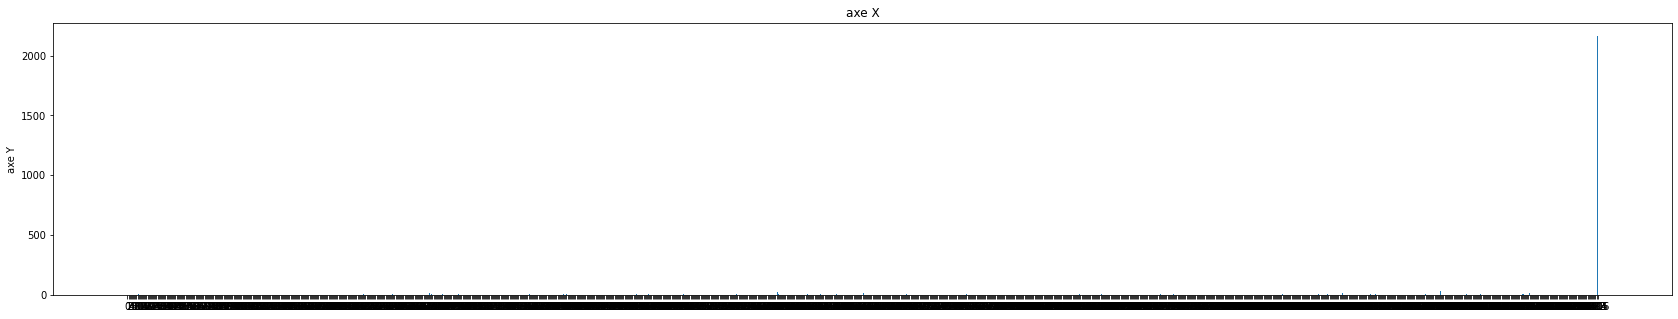

In [30]:
Figures.funShowHisto(Count, idGroupByID)

In [9]:
idGroupByID = dataGroupByID.toPandas()["ID"].values.tolist()
Count = dataGroupByID.toPandas()["count"].values.tolist()

cpt = 0
cpt2 = 0
for i in range(len(idGroupByID)):
    if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", idGroupByID[i])):
        cpt +=1
        
    else:
        cpt2 +=1

labels = ["UUID","nonUUID"]
values = [cpt,cpt2]
#print (values)

[2164, 1316]


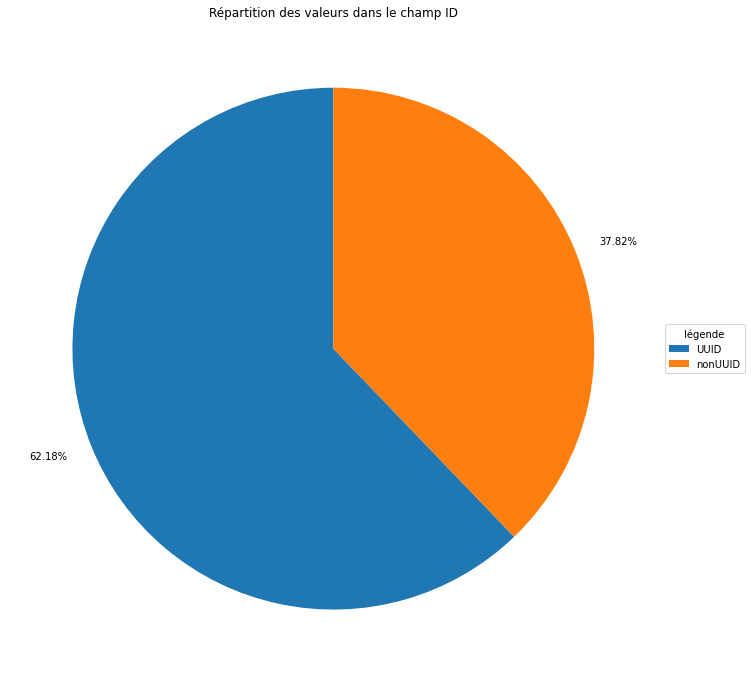

In [37]:
Figures.showPieChart(labels,values,"Répartition des valeurs dans le champ ID")

**ID Processing:**

*L'analyse montre que la colonne ID est constitué d'autres types de valeurs différents d'un UUID. Donc pour corriger ces données il y a deux possibités:*
- Soit **générer des UUID** pour les valeurs incorrectes
- Soit **supprimmer toutes les lignes avec des valeurs d'ID incorrectes**


1. Générer des UUID pour les valeurs incorrectes:

In [120]:
import uuid

#Colonne initial ID non traité
IDColumnNotCleanned = data.toPandas()["ID"].values.tolist()

def checkIfUUIDExist(lists, value):
    """Cette fonction permet de vérifier si l'UUID généré existe dans la liste"""
    if value in lists:
        return True
    return False

def generateUUID():
    """Cette fonction permet de générer un UUID en cherchant déjà si elle existe ou pas"""
    val = str(uuid.uuid4())   
    if checkIfUUIDExist(IDColumnNotCleanned, val):
        generateUUID()
    return (val,)

# Pour convertir un RDD en tuple, il ne faut pas oublier de renvoyer dans la fonction lambda des tuple. Exemple: (x[0], )
IDCleanned = data.select("ID").rdd.map(lambda x: (x[0], ) if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x[0])) else generateUUID() )
#test3 = test2.flatMap(lambda x: x if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x)) else str(uuid.uuid1()))

In [122]:
IDCleanned = IDCleanned.toDF()

In [124]:
data = data.withColumn('ID', IDCleanned)

AssertionError: col should be Column

In [35]:
print(ID)

['22c05930-0eb5-11e7-b53d-bbead8ba43fe', '8d092fa0-bb99-11e8-a7c9-852783b5a69d', '44b6a5c0-3466-11e9-8213-25cc7d9bf5fc', 'e9e07ed0-812f-11e8-82aa-61eacebe4584', '872302b0-5a21-11e9-950c-510fefc1ed35', 'de04afa0-2e5f-11e8-bda5-3334b193df7f', '530c7ac0-36a5-11e7-a435-b3bf21527190', '5135e0a0-62dd-11e8-91b3-8d7b603ef3b8', 'bc076370-45ec-11e9-a00a-897941d6ca9c', 'Accès facile avec badge.', 'Loyer mensuel : 100 € toutes charges comprises.', 'Disponibilité immédiate."', '08491e50-8dfe-11e9-8a42-a16638394d93', 'A vendre à Levallois-Perret', 'Pour toute information complémentaire ou pour prendre rendez-vous contactez nous au 01.47.48.90.10.', 'Référence annonce : V19775', 'Les honoraires sont à la charge du vendeur"', '362044d0-7e09-11e8-82aa-61eacebe4584', 'eb871be0-98df-11e9-b883-7d9a2d13f1b7', 'A deux pas du Parc de la Planchette', 'Assurance Multirisques Privilège *: 12.6 € / mois', '*Services facultatifs', 'Référence annonce : 1551997', "Honoraires à la charge du locataire : 690 € TTC don

In [ ]:
ID = list(map(lambda x:x if bool( re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x) ) else "" ,ID) )

In [ ]:
print (ID)

In [ ]:
expression = r'\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b'
dataID = data.filter(data['ID'].rlike(expression))

In [ ]:
dataID.select(data.ID, data.URL).show(100)